In [3]:
# # Untuk peta lengkap (recommended)
# !pip install cartopy geopandas matplotlib pandas numpy

# # Jika cartopy sulit, gunakan hanya:
# !pip install matplotlib pandas numpy

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\user\AppData\Local\Temp\ipykernel_37348\4026224902.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\user\AppData\Local\Programs\Pytho

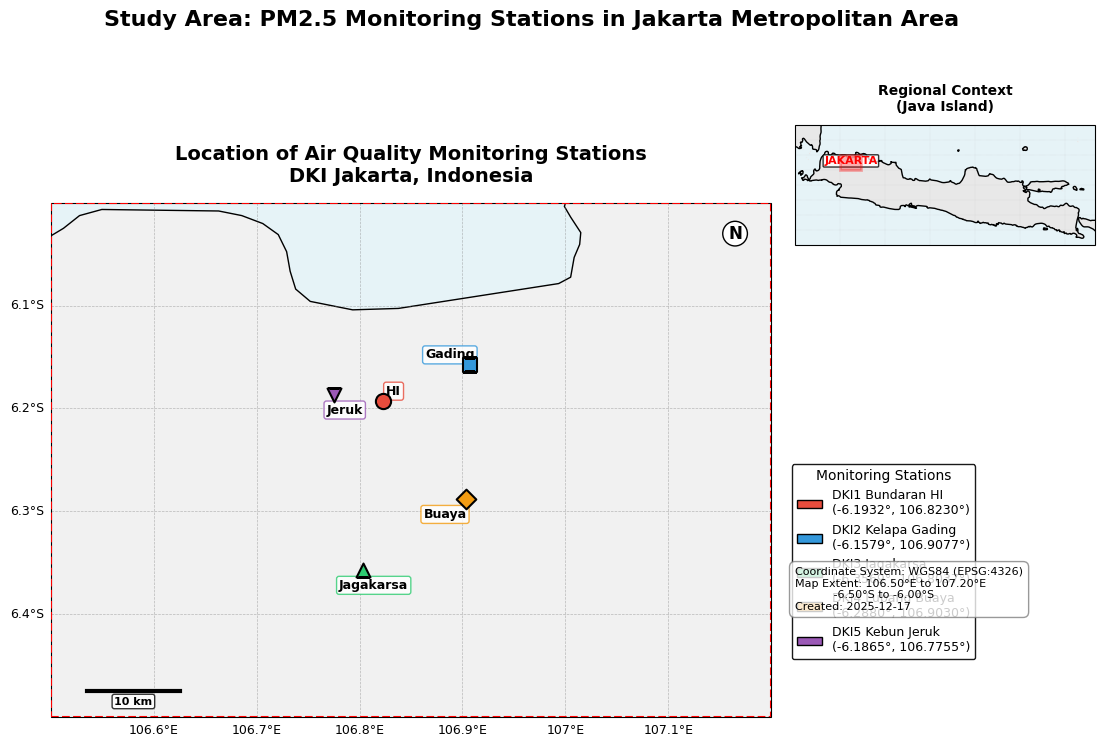


ALTERNATIF: SIMPLE MAP DENGAN MATPLOTLIB SAJA


C:\Users\user\AppData\Local\Temp\ipykernel_37348\4026224902.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


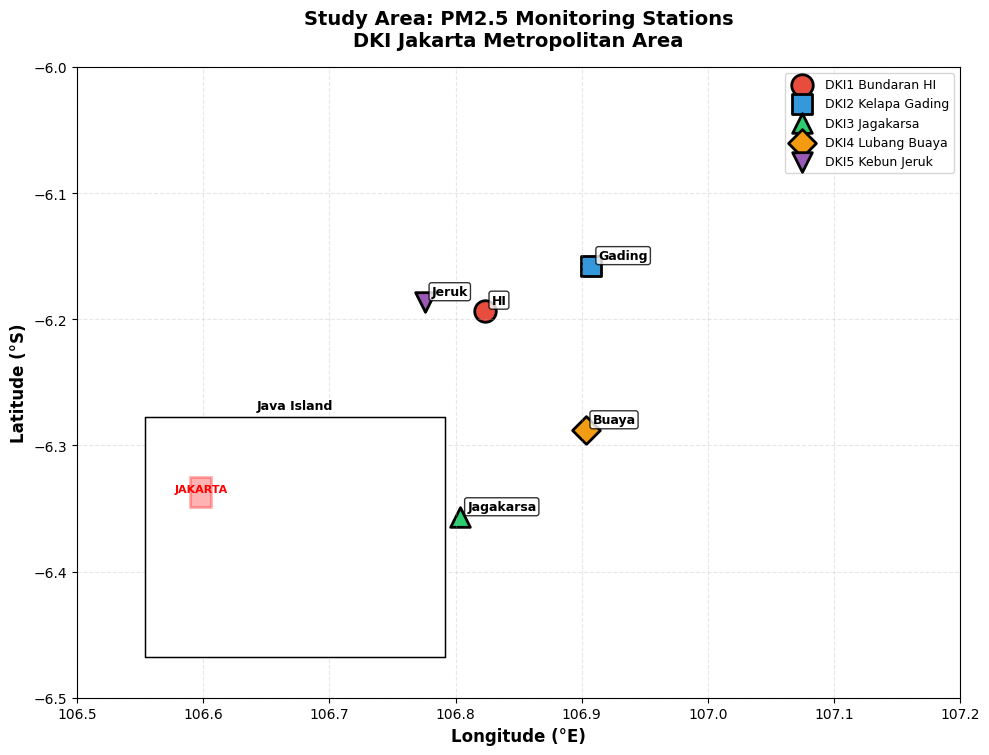


✅ Peta telah dibuat dengan 5 stasiun pemantauan
📁 Disimpan sebagai: study_area_map_jakarta.png
📁 Dan versi simple: study_area_map_simple.png


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patheffects as pe

# ==============================
# 1. DATA LOKASI STASIUN ANDA
# ==============================
# Ganti dengan koordinat sebenarnya dari stasiun Anda
stations_data = {
    'Stasiun': ['DKI1 Bundaran HI', 'DKI2 Kelapa Gading', 'DKI3 Jagakarsa', 
                'DKI4 Lubang Buaya', 'DKI5 Kebun Jeruk'],
    'Provinsi': ['DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta'],
    'Latitude': [-6.1932, -6.1579, -6.35693, -6.2880, -6.1865],
    'Longitude': [106.8230, 106.9077, 106.80367, 106.9030, 106.7755]
}

stations_df = pd.DataFrame(stations_data)

# ==============================
# 2. BUAT MAIN FIGURE
# ==============================
fig = plt.figure(figsize=(12, 10))

# ------------------------------
# 2.1 MAIN MAP (JAKARTA DETAIL)
# ------------------------------
# Definisikan proyeksi
proj = ccrs.PlateCarree()

# Main map - area Jakarta lebih detail
ax_main = plt.axes([0.1, 0.1, 0.6, 0.8], projection=proj)

# Set extent untuk area Jakarta dan sekitarnya
jakarta_extent = [106.5, 107.2, -6.5, -6.0]  # [min_lon, max_lon, min_lat, max_lat]
ax_main.set_extent(jakarta_extent, crs=proj)

# Tambahkan feature peta
ax_main.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)
ax_main.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5, linestyle=':')
ax_main.add_feature(cfeature.LAND.with_scale('10m'), facecolor='lightgray', alpha=0.3)
ax_main.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='lightblue', alpha=0.3)
ax_main.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', alpha=0.3)
ax_main.add_feature(cfeature.RIVERS.with_scale('10m'), facecolor='lightblue', alpha=0.5)

# Tambahkan gridlines
gl = ax_main.gridlines(crs=proj, draw_labels=True,
                       linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

# Plot lokasi stasiun
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']
markers = ['o', 's', '^', 'D', 'v']
sizes = [120, 100, 100, 100, 100]

for idx, row in stations_df.iterrows():
    ax_main.scatter(row['Longitude'], row['Latitude'],
                   c=colors[idx], s=sizes[idx], marker=markers[idx],
                   edgecolor='black', linewidth=1.5, zorder=10,
                   transform=proj, label=row['Stasiun'])
    
    # Tambahkan label stasiun
    offset_x = 0.01 if idx % 2 == 0 else -0.02
    offset_y = 0.01 if idx < 2 else -0.015
    
    ax_main.text(row['Longitude'] + offset_x, row['Latitude'] + offset_y,
                f"{row['Stasiun'].split()[-1]}",  # Ambil bagian terakhir nama
                fontsize=9, fontweight='bold',
                ha='center', va='center',
                transform=proj,
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8, edgecolor=colors[idx]))

# Tambahkan kotak untuk inset map
jakarta_rect = Rectangle((jakarta_extent[0], jakarta_extent[2]),
                        jakarta_extent[1] - jakarta_extent[0],
                        jakarta_extent[3] - jakarta_extent[2],
                        linewidth=1.5, linestyle='--',
                        edgecolor='red', facecolor='none',
                        transform=proj, zorder=5)
ax_main.add_patch(jakarta_rect)

# Judul main map
ax_main.set_title('Location of Air Quality Monitoring Stations\nDKI Jakarta, Indonesia',
                 fontsize=14, fontweight='bold', pad=15)

# ------------------------------
# 2.2 INSET MAP (INDONESIA/JAWA)
# ------------------------------
# Inset map untuk konteks regional
ax_inset = plt.axes([0.72, 0.65, 0.25, 0.25], projection=proj)

# Set extent untuk Jawa atau Indonesia
# Pilihan 1: Pulau Jawa
java_extent = [105.0, 115.0, -9.0, -5.0]
# Pilihan 2: Indonesia bagian barat
indonesia_extent = [95.0, 115.0, -11.0, 6.0]

ax_inset.set_extent(java_extent, crs=proj)

# Tambahkan feature sederhana
ax_inset.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)
ax_inset.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5, linestyle=':')
ax_inset.add_feature(cfeature.LAND.with_scale('10m'), facecolor='lightgray', alpha=0.5)
ax_inset.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='lightblue', alpha=0.3)

# Highlight area Jakarta di inset map
jakarta_rect_inset = Rectangle((jakarta_extent[0], jakarta_extent[2]),
                              jakarta_extent[1] - jakarta_extent[0],
                              jakarta_extent[3] - jakarta_extent[2],
                              linewidth=2, linestyle='-',
                              edgecolor='red', facecolor='red', alpha=0.3,
                              transform=proj, zorder=5)
ax_inset.add_patch(jakarta_rect_inset)

# Tambahkan label "JAKARTA" di inset
ax_inset.text(106.86, -6.2, 'JAKARTA', fontsize=8, fontweight='bold',
             ha='center', va='center', color='red',
             transform=proj,
             bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0.8))

# Tambahkan gridlines sederhana
gl_inset = ax_inset.gridlines(crs=proj, draw_labels=True,
                             linewidth=0.3, color='gray', alpha=0.3, linestyle=':')
gl_inset.top_labels = False
gl_inset.right_labels = False
gl_inset.left_labels = False
gl_inset.bottom_labels = False

ax_inset.set_title('Regional Context\n(Java Island)', fontsize=10, fontweight='bold', pad=10)

# ------------------------------
# 2.3 LEGEND
# ------------------------------
# Buat legend manual
legend_elements = []
for idx, row in stations_df.iterrows():
    legend_elements.append(
        mpatches.Patch(facecolor=colors[idx], edgecolor='black',
                      label=f"{row['Stasiun']}\n({row['Latitude']:.4f}°, {row['Longitude']:.4f}°)")
    )

# Tambahkan kotak legenda
legend = ax_main.legend(handles=legend_elements,
                       loc='lower left',
                       bbox_to_anchor=(1.02, 0.1),
                       fontsize=9,
                       title="Monitoring Stations",
                       title_fontsize=10,
                       frameon=True,
                       framealpha=0.9,
                       edgecolor='black')
legend.get_frame().set_facecolor('white')

# ------------------------------
# 2.4 SCALE BAR
# ------------------------------
# Tambahkan scale bar (estimasi)
import matplotlib.transforms as mtransforms

# Fungsi untuk scale bar
def scale_bar(ax, length_km, location=(0.05, 0.05)):
    """
    Tambahkan scale bar ke peta
    """
    # Convert km ke degrees (aproksimasi di khatulistiwa)
    length_deg = length_km / 111.0
    
    # Get limits
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    # Position
    x_pos = xmin + (xmax - xmin) * location[0]
    y_pos = ymin + (ymax - ymin) * location[1]
    
    # Draw scale bar
    ax.plot([x_pos, x_pos + length_deg], [y_pos, y_pos],
            color='black', linewidth=3, transform=proj)
    
    # Add text
    ax.text(x_pos + length_deg/2, y_pos - 0.005,
            f'{length_km} km',
            ha='center', va='top',
            fontsize=8, fontweight='bold',
            transform=proj,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Tambahkan scale bar 10 km
scale_bar(ax_main, 10, location=(0.05, 0.05))

# ------------------------------
# 2.5 NORTH ARROW
# ------------------------------
# Tambahkan north arrow
def north_arrow(ax, x=0.95, y=0.95, size=30):
    """
    Tambahkan north arrow ke peta
    """
    ax.annotate('N', xy=(x, y), xytext=(x, y-0.01),
                arrowprops=dict(arrowstyle='->', facecolor='black', lw=1.5),
                xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                ha='center', va='center',
                bbox=dict(boxstyle="circle,pad=0.2", facecolor="white", edgecolor='black'))

north_arrow(ax_main)

# ------------------------------
# 2.6 ANOTASI TAMBAHAN
# ------------------------------
# Tambahkan informasi proyeksi dan skala
info_text = f"""Coordinate System: WGS84 (EPSG:4326)
Map Extent: {jakarta_extent[0]:.2f}°E to {jakarta_extent[1]:.2f}°E
           {jakarta_extent[2]:.2f}°S to {jakarta_extent[3]:.2f}°S
Created: {pd.Timestamp.now().strftime('%Y-%m-%d')}"""

plt.figtext(0.72, 0.35, info_text,
           fontsize=8,
           bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8, edgecolor='gray'))

# ------------------------------
# 3. SAVE DAN TAMPILKAN
# ------------------------------
plt.suptitle('Study Area: PM2.5 Monitoring Stations in Jakarta Metropolitan Area',
            fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.savefig('study_area_map_jakarta.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ==============================
# 4. VERSI SIMPLE (TANPA CARTOPY)
# ==============================
# Jika cartopy sulit diinstall, gunakan versi simple dengan basemap

print("\n" + "="*70)
print("ALTERNATIF: SIMPLE MAP DENGAN MATPLOTLIB SAJA")
print("="*70)

# Plot simple dengan scatter plot
fig2, ax2 = plt.subplots(figsize=(10, 8))

# Plot titik-titik stasiun
for idx, row in stations_df.iterrows():
    ax2.scatter(row['Longitude'], row['Latitude'],
               c=colors[idx], s=sizes[idx]*2, marker=markers[idx],
               edgecolor='black', linewidth=2,
               label=f"{row['Stasiun']}")

# Atur axis
ax2.set_xlim(106.5, 107.2)
ax2.set_ylim(-6.5, -6.0)
ax2.set_aspect('equal')

# Grid
ax2.grid(True, alpha=0.3, linestyle='--')

# Labels
ax2.set_xlabel('Longitude (°E)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Latitude (°S)', fontsize=12, fontweight='bold')
ax2.set_title('Study Area: PM2.5 Monitoring Stations\nDKI Jakarta Metropolitan Area',
             fontsize=14, fontweight='bold', pad=15)

# Legend
ax2.legend(loc='upper right', fontsize=9)

# Anotasi untuk setiap titik
for idx, row in stations_df.iterrows():
    ax2.annotate(row['Stasiun'].split()[-1],
                (row['Longitude'], row['Latitude']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Tambahkan inset map simple
inset_ax = fig2.add_axes([0.15, 0.15, 0.3, 0.3])  # [left, bottom, width, height]

# Plot Indonesia/Jawa sederhana
# Ini hanya placeholder - untuk peta sebenarnya perlu shapefile
inset_ax.set_xlim(105, 115)
inset_ax.set_ylim(-9, -5)
inset_ax.set_xticks([])
inset_ax.set_yticks([])

# Highlight Jakarta area
inset_ax.add_patch(Rectangle((jakarta_extent[0], jakarta_extent[2]),
                           jakarta_extent[1] - jakarta_extent[0],
                           jakarta_extent[3] - jakarta_extent[2],
                           linewidth=2, linestyle='-',
                           edgecolor='red', facecolor='red', alpha=0.3))

inset_ax.text(106.86, -6.2, 'JAKARTA', fontsize=8, fontweight='bold',
             ha='center', va='center', color='red')

inset_ax.set_title('Java Island', fontsize=9, fontweight='bold')
inset_ax.set_frame_on(True)
inset_ax.patch.set_edgecolor('black')
inset_ax.patch.set_linewidth(1)

plt.tight_layout()
plt.savefig('study_area_map_simple.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Peta telah dibuat dengan {len(stations_df)} stasiun pemantauan")
print(f"📁 Disimpan sebagai: study_area_map_jakarta.png")
print(f"📁 Dan versi simple: study_area_map_simple.png")

Sedang mengunduh data peta wilayah...
Error download peta: HTTP Error 404: Not Found


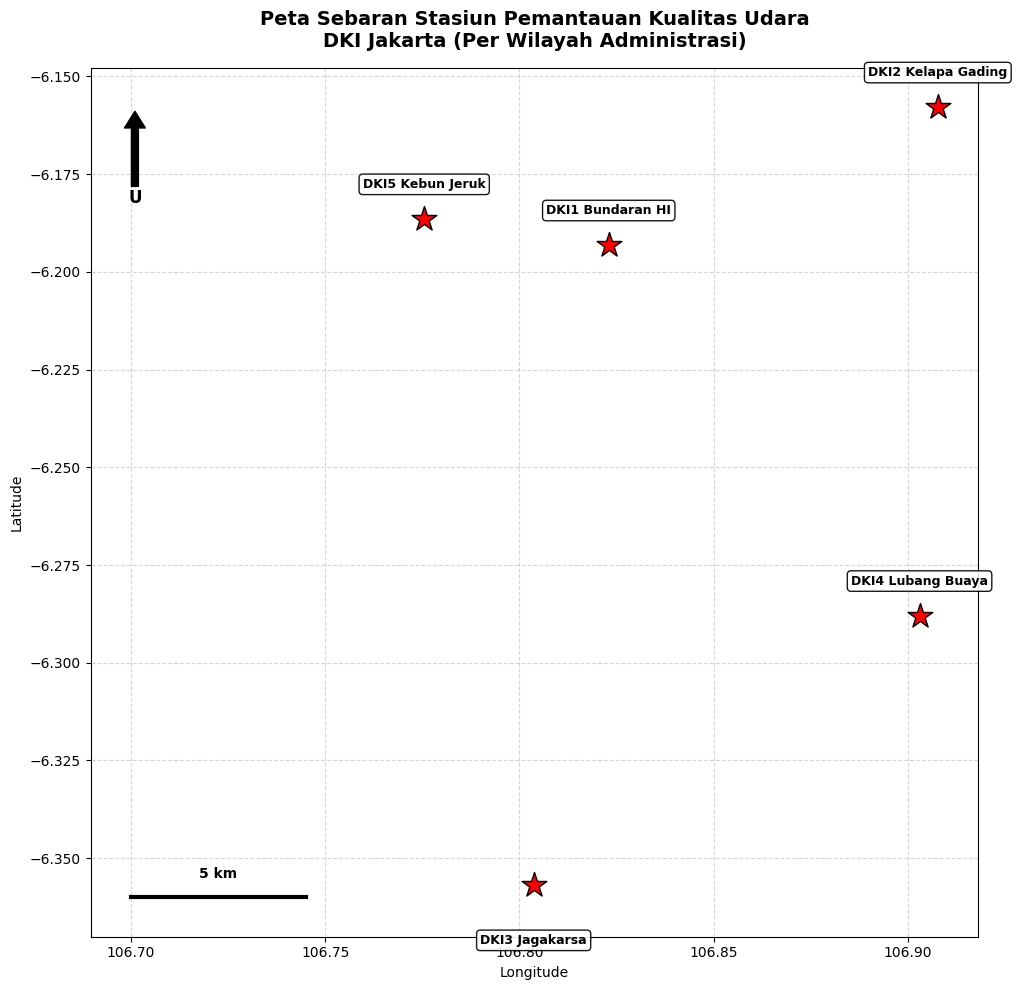

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
import matplotlib.lines as mlines

# ==========================================
# 1. SETUP DATA STASIUN (DATA ANDA)
# ==========================================
data = {
    'Stasiun': ['DKI1 Bundaran HI', 'DKI2 Kelapa Gading', 'DKI3 Jagakarsa', 
                'DKI4 Lubang Buaya', 'DKI5 Kebun Jeruk'],
    'Wilayah': ['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Selatan', 
                'Jakarta Timur', 'Jakarta Barat'],
    'Lat': [-6.1932, -6.1579, -6.35693, -6.2880, -6.1865],
    'Lon': [106.8230, 106.9077, 106.80367, 106.9030, 106.7755]
}
df_stations = pd.DataFrame(data)

# Ubah ke GeoDataFrame untuk plotting spasial
gdf_stations = gpd.GeoDataFrame(
    df_stations, 
    geometry=gpd.points_from_xy(df_stations.Lon, df_stations.Lat),
    crs="EPSG:4326"
)

# ==========================================
# 2. LOAD PETA BATAS KOTA (GEOJSON)
# ==========================================
# URL ini berisi batas Kota/Kabupaten di DKI Jakarta (Kode wilayah 31)
geojson_url = "https://raw.githubusercontent.com/ans-4175/peta-indonesia-geojson/master/kabupaten/31.json"

print("Sedang mengunduh data peta wilayah...")
try:
    gdf_jakarta = gpd.read_file(geojson_url)
    # Filter membuang Kepulauan Seribu agar peta fokus ke daratan utama Jakarta
    # Kepulauan Seribu biasanya membuat peta jadi "kurus" dan banyak laut kosong
    gdf_jakarta = gdf_jakarta[~gdf_jakarta['nama'].str.contains("SERIBU", case=False, na=False)]
except Exception as e:
    print(f"Error download peta: {e}")
    gdf_jakarta = None

# ==========================================
# 3. PLOTTING
# ==========================================
fig, ax = plt.subplots(figsize=(12, 10))

if gdf_jakarta is not None:
    # A. PLOT AREA KOTA (WARNA-WARNI)
    # column='nama' akan mewarnai berdasarkan nama kota
    # cmap='Pastel2' memberikan warna lembut agar titik stasiun terlihat jelas
    gdf_jakarta.plot(ax=ax, column='nama', cmap='Pastel1', 
                     edgecolor='gray', linewidth=0.8, alpha=0.9, legend=False)

    # Tambahkan Label Nama Kota di Peta
    # Kita ambil titik tengah (centroid) dari setiap polygon kota
    for x, y, label in zip(gdf_jakarta.geometry.centroid.x, gdf_jakarta.geometry.centroid.y, gdf_jakarta['nama']):
        # Sedikit cleaning nama (misal "JAKARTA SELATAN" -> "JAKSEL")
        short_name = label.replace("ADMINISTRASI ", "").title()
        ax.text(x, y, short_name, fontsize=10, ha='center', va='center', 
                color='black', fontweight='bold', alpha=0.4)

# B. PLOT TITIK STASIUN
gdf_stations.plot(ax=ax, color='red', marker='*', markersize=350, 
                  edgecolor='black', zorder=10, label='Stasiun SPKU')

# C. LABEL STASIUN (RAPI)
for x, y, label in zip(df_stations.Lon, df_stations.Lat, df_stations.Stasiun):
    # Geser label sedikit agar tidak menumpuk
    y_offset = 0.008
    if "Jagakarsa" in label: y_offset = -0.015 # Geser ke bawah khusus Jagakarsa
    if "Utara" in label: y_offset = 0.01
    
    ax.text(x, y + y_offset, label, fontsize=9, ha='center', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9, edgecolor='black'))

# ==========================================
# 4. MEMPERCANTIK PETA (LEGEND, SKALA, ARAH)
# ==========================================

# A. Set Batas Area (Zoom Fit)
# Agar tidak ada ruang kosong berlebih
if gdf_jakarta is not None:
    minx, miny, maxx, maxy = gdf_jakarta.total_bounds
    ax.set_xlim(minx - 0.02, maxx + 0.02)
    ax.set_ylim(miny - 0.02, maxy + 0.02)

# B. Legenda Padat
# Buat handle manual
star_handle = mlines.Line2D([], [], color='red', marker='*', linestyle='None',
                          markersize=15, markeredgecolor='black', label='Lokasi Stasiun PM2.5')

# Ambil warna wilayah untuk legenda
if gdf_jakarta is not None:
    cmap = plt.get_cmap('Pastel1')
    patches = []
    # Urutkan nama kota agar rapi di legenda
    unique_cities = sorted(gdf_jakarta['nama'].unique())
    for i, city in enumerate(unique_cities):
        # Normalisasi index warna
        color = cmap(i / len(unique_cities)) if len(unique_cities) > 0 else 'grey'
        clean_name = city.replace("KOTA ADMINISTRASI ", "").title()
        patches.append(mpatches.Patch(color=color, label=clean_name))
    
    # Gabungkan bintang + wilayah di satu legenda
    all_handles = [star_handle] + patches
    ax.legend(handles=all_handles, loc='upper right', title="Legenda", 
              fontsize='small', framealpha=0.95, edgecolor='black')

# C. Arah Utara (North Arrow) Manual
x, y, arrow_length = 0.05, 0.95, 0.1
ax.annotate('U', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, fontweight='bold',
            xycoords=ax.transAxes)

# D. Scale Bar Manual (Perkiraan 5 km)
# 1 derajat lat ~ 111 km. 5 km ~ 0.045 derajat
scale_len = 0.045
scale_x, scale_y = 0.05, 0.05
ax.plot([106.70, 106.70 + scale_len], [-6.36, -6.36], color='black', linewidth=3)
ax.text(106.70 + scale_len/2, -6.355, '5 km', ha='center', fontsize=10, fontweight='bold')

# Judul dan Hapus Axis
ax.set_title('Peta Sebaran Stasiun Pemantauan Kualitas Udara\nDKI Jakarta (Per Wilayah Administrasi)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_37348\3026848300.py:223: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), size,
C:\Users\user\AppData\Local\Temp\ipykernel_37348\3026848300.py:319: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color=color, alpha=0.6,


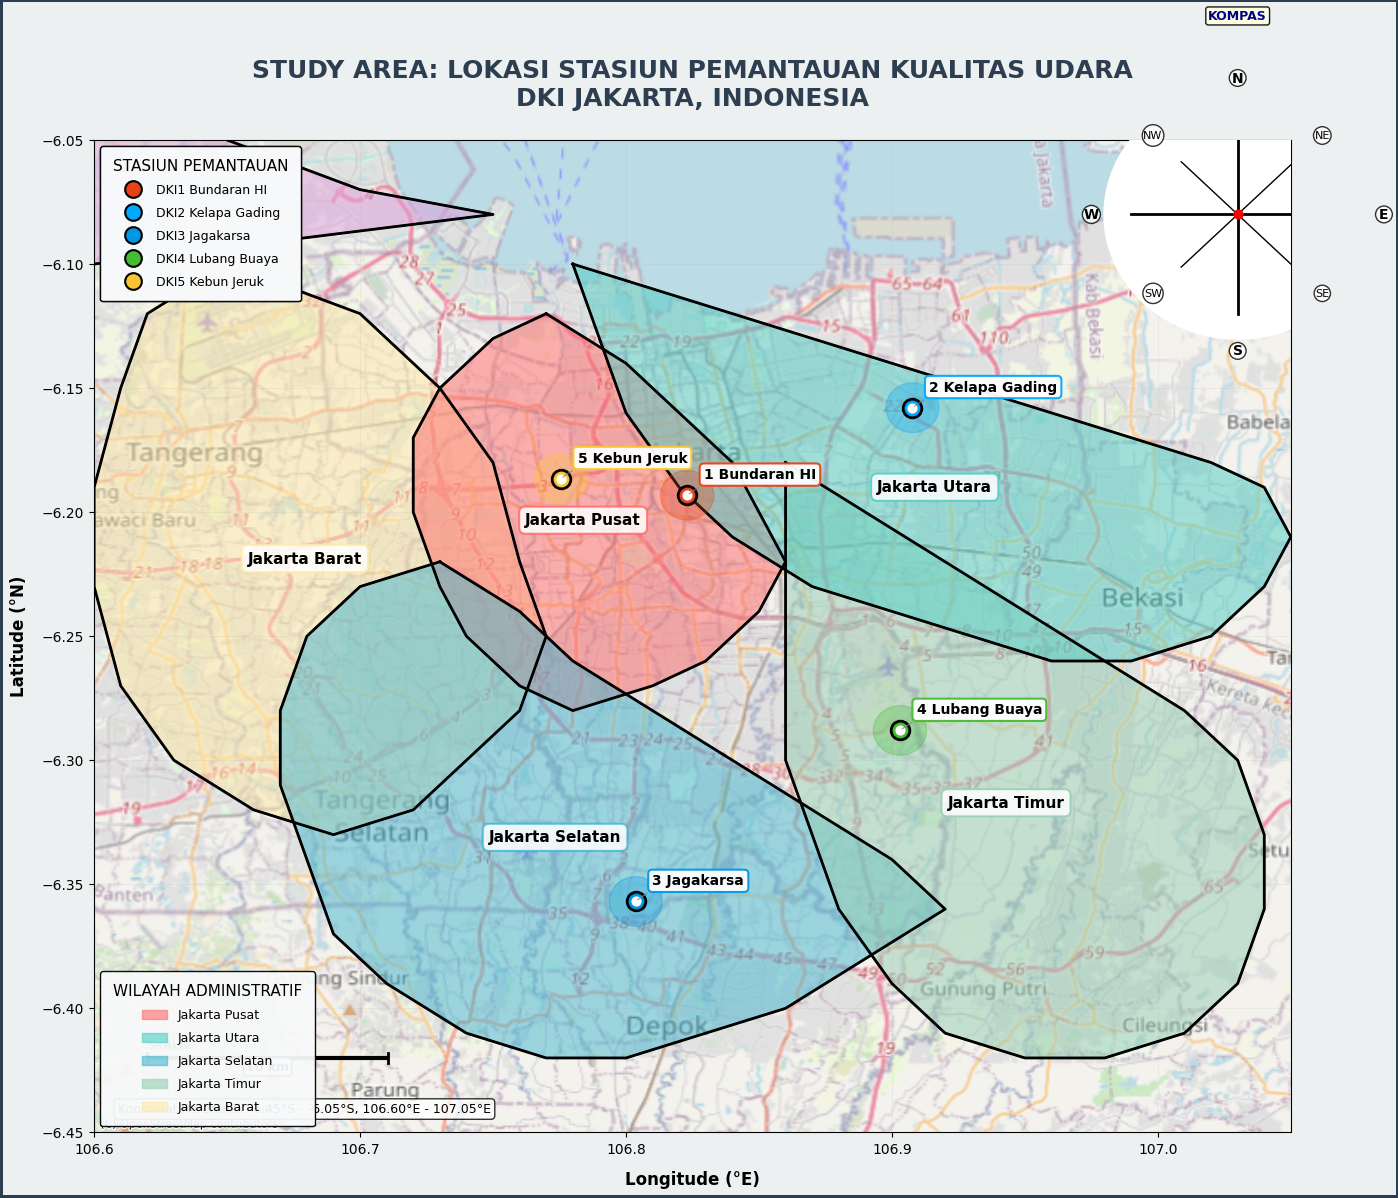

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'quality'

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
from matplotlib.lines import Line2D
import numpy as np

# Data stasiun
stations_data = {
    'Stasiun': ['DKI1 Bundaran HI', 'DKI2 Kelapa Gading', 'DKI3 Jagakarsa', 
                'DKI4 Lubang Buaya', 'DKI5 Kebun Jeruk'],
    'Provinsi': ['DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta'],
    'Latitude': [-6.1932, -6.1579, -6.35693, -6.2880, -6.1865],
    'Longitude': [106.8230, 106.9077, 106.80367, 106.9030, 106.7755],
    'Kota': ['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Barat']
}

# Warna untuk setiap kota administratif di Jakarta
city_colors = {
    'Jakarta Pusat': '#FF6B6B',    # Coral Red
    'Jakarta Utara': '#4ECDC4',    # Turquoise
    'Jakarta Selatan': '#45B7D1',  # Sky Blue
    'Jakarta Timur': '#96CEB4',    # Mint Green
    'Jakarta Barat': '#FFEAA7',    # Light Yellow
    'Jakarta Kepulauan': '#DDA0DD' # Plum
}

# Warna untuk stasiun (lebih gelap dari area)
station_colors = {
    'Jakarta Pusat': '#E84118',    # Vibrant Red
    'Jakarta Utara': '#00A8FF',    # Blue
    'Jakarta Selatan': '#0097E6',  # Darker Blue
    'Jakarta Timur': '#44BD32',    # Green
    'Jakarta Barat': '#FBC531'     # Yellow
}

# Membuat figure dan axes dengan layout yang lebih baik
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Bingkai peta Jakarta yang diperluas sedikit
jakarta_bbox = {
    'min_lon': 106.60,
    'max_lon': 107.05,
    'min_lat': -6.45,
    'max_lat': -6.05
}

ax.set_xlim([jakarta_bbox['min_lon'], jakarta_bbox['max_lon']])
ax.set_ylim([jakarta_bbox['min_lat'], jakarta_bbox['max_lat']])

# Coba menambahkan peta dasar dari OpenStreetMap
try:
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.8)
except:
    # Fallback jika tidak ada internet
    ax.set_facecolor('#f0f8ff')
    print("Menggunakan background warna karena OpenStreetMap tidak tersedia")

# --- MENGGAMBAR BATAS WILAYAH KOTA JAKARTA (APPROKSIMASI) ---
# Data koordinat poligon untuk setiap kota (pendekatan dengan shape yang lebih alami)
city_polygons = {
    'Jakarta Barat': Polygon([
        (106.65, -6.10), (106.70, -6.12), (106.73, -6.15), (106.75, -6.18),
        (106.76, -6.22), (106.77, -6.25), (106.76, -6.28), (106.74, -6.30),
        (106.72, -6.32), (106.69, -6.33), (106.66, -6.32), (106.63, -6.30),
        (106.61, -6.27), (106.60, -6.23), (106.60, -6.19), (106.61, -6.15),
        (106.62, -6.12), (106.65, -6.10)
    ]),
    
    'Jakarta Pusat': Polygon([
        (106.77, -6.12), (106.80, -6.14), (106.82, -6.16), (106.84, -6.18),
        (106.85, -6.20), (106.86, -6.22), (106.85, -6.24), (106.83, -6.26),
        (106.81, -6.27), (106.78, -6.28), (106.76, -6.27), (106.74, -6.25),
        (106.73, -6.23), (106.72, -6.20), (106.72, -6.17), (106.73, -6.15),
        (106.75, -6.13), (106.77, -6.12)
    ]),
    
    'Jakarta Selatan': Polygon([
        (106.73, -6.22), (106.76, -6.24), (106.78, -6.26), (106.81, -6.28),
        (106.84, -6.30), (106.87, -6.32), (106.90, -6.34), (106.92, -6.36),
        (106.89, -6.38), (106.86, -6.40), (106.83, -6.41), (106.80, -6.42),
        (106.77, -6.42), (106.74, -6.41), (106.71, -6.39), (106.69, -6.37),
        (106.68, -6.34), (106.67, -6.31), (106.67, -6.28), (106.68, -6.25),
        (106.70, -6.23), (106.73, -6.22)
    ]),
    
    'Jakarta Timur': Polygon([
        (106.86, -6.18), (106.89, -6.20), (106.92, -6.22), (106.95, -6.24),
        (106.98, -6.26), (107.01, -6.28), (107.03, -6.30), (107.04, -6.33),
        (107.04, -6.36), (107.03, -6.39), (107.01, -6.41), (106.98, -6.42),
        (106.95, -6.42), (106.92, -6.41), (106.90, -6.39), (106.88, -6.36),
        (106.87, -6.33), (106.86, -6.30), (106.86, -6.27), (106.86, -6.24),
        (106.86, -6.21), (106.86, -6.18)
    ]),
    
    'Jakarta Utara': Polygon([
        (106.78, -6.10), (106.81, -6.11), (106.84, -6.12), (106.87, -6.13),
        (106.90, -6.14), (106.93, -6.15), (106.96, -6.16), (106.99, -6.17),
        (107.02, -6.18), (107.04, -6.19), (107.05, -6.21), (107.04, -6.23),
        (107.02, -6.25), (106.99, -6.26), (106.96, -6.26), (106.93, -6.25),
        (106.90, -6.24), (106.87, -6.23), (106.84, -6.21), (106.82, -6.19),
        (106.80, -6.16), (106.79, -6.13), (106.78, -6.10)
    ]),
    
    'Jakarta Kepulauan': Polygon([
        (106.55, -5.95), (106.60, -6.00), (106.65, -6.05), (106.70, -6.07),
        (106.75, -6.08), (106.60, -6.10), (106.55, -6.05), (106.50, -6.00),
        (106.55, -5.95)
    ])
}

# Plot area untuk setiap kota dengan bentuk poligon yang lebih alami
for city, polygon in city_polygons.items():
    color = city_colors[city]
    
    # Menggambar poligon dengan gradasi warna
    from matplotlib.colors import LightSource
    x, y = polygon.exterior.xy
    
    # Membuat shading 3D untuk efek kedalaman
    ls = LightSource(azdeg=315, altdeg=45)
    
    # Plot poligon dengan shading
    ax.fill(x, y, 
            color=color, 
            alpha=0.5,  # Transparansi lebih rendah untuk area
            edgecolor='black',
            linewidth=1.5,
            zorder=1)
    
    # Menambahkan outline yang lebih tebal
    ax.plot(x, y, color='black', linewidth=2, zorder=2)
    
    # Menambahkan label kota di centroid poligon
    centroid = polygon.centroid
    if city != 'Jakarta Kepulauan':  # Label lebih kecil untuk Kepulauan
        fontsize = 11 if city != 'Jakarta Kepulauan' else 9
        ax.text(centroid.x, centroid.y, city, 
                fontsize=fontsize, 
                fontweight='bold',
                ha='center', 
                va='center',
                color='black',
                bbox=dict(boxstyle="round,pad=0.4", 
                         facecolor='white', 
                         alpha=0.85, 
                         edgecolor=color,
                         linewidth=1.5),
                zorder=3)

# Plot titik stasiun dengan simbol yang lebih menarik
for i in range(len(stations_data['Stasiun'])):
    stasiun = stations_data['Stasiun'][i]
    kota = stations_data['Kota'][i]
    lat = stations_data['Latitude'][i]
    lon = stations_data['Longitude'][i]
    
    # Membuat simbol stasiun dengan 2 lingkaran (outer dan inner)
    outer_circle = plt.Circle((lon, lat), 0.01, 
                             color=station_colors[kota], 
                             alpha=0.3, 
                             zorder=4)
    ax.add_patch(outer_circle)
    
    # Titik pusat dengan warna solid
    ax.scatter(lon, lat, 
               color=station_colors[kota], 
               edgecolor='black', 
               s=180, 
               zorder=5,
               linewidth=2,
               marker='o')
    
    # Simbol tambahan (titik kecil di tengah)
    ax.scatter(lon, lat, 
               color='white', 
               s=40, 
               zorder=6,
               marker='o')
    
    # Label stasiun dengan konektor line
    label_text = stasiun.replace('DKI', '').strip()
    ax.annotate(label_text, 
                (lon, lat),
                xytext=(12, 12),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                color='black',
                arrowprops=dict(arrowstyle='-', 
                              color='gray', 
                              alpha=0.7,
                              connectionstyle="arc3,rad=0.2"),
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='white', 
                         alpha=0.95, 
                         edgecolor=station_colors[kota],
                         linewidth=1.5),
                zorder=7)

# Menambahkan grid dengan style yang lebih halus
ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

# Menambahkan label sumbu dengan font yang lebih baik
ax.set_xlabel('Longitude (°E)', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Latitude (°N)', fontsize=12, fontweight='bold', labelpad=10)

# Judul peta dengan multiple lines
title_text = 'STUDY AREA: LOKASI STASIUN PEMANTAUAN KUALITAS UDARA\nDKI JAKARTA, INDONESIA'
ax.set_title(title_text, 
             fontsize=18, 
             fontweight='bold', 
             pad=25,
             color='#2c3e50',
             fontfamily='sans-serif')

# --- KOMPAS ARAH MATA ANGIN YANG DETAIL ---
def draw_compass(ax, x, y, size=0.08):
    """Menggambar kompas arah mata angin yang detail"""
    
    # Lingkaran kompas
    circle = plt.Circle((x, y), size, 
                       color='white', 
                       edgecolor='black', 
                       linewidth=2,
                       zorder=10)
    ax.add_patch(circle)
    
    # Titik pusat
    ax.scatter(x, y, color='red', s=40, zorder=11, marker='o')
    
    # Arah mata angin utama
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    
    for direction, angle in zip(directions, angles):
        # Konversi derajat ke radian
        rad = np.deg2rad(angle)
        
        # Panjang panah berbeda untuk arah utama
        length = size * 0.8 if direction in ['N', 'E', 'S', 'W'] else size * 0.6
        
        # Hitung posisi akhir
        end_x = x + length * np.sin(rad)
        end_y = y + length * np.cos(rad)
        
        # Gambar garis
        ax.plot([x, end_x], [y, end_y], 
                color='black', 
                linewidth=2 if direction in ['N', 'E', 'S', 'W'] else 1,
                zorder=10)
        
        # Label arah
        label_x = x + (length + 0.015) * np.sin(rad)
        label_y = y + (length + 0.015) * np.cos(rad)
        
        font_weight = 'bold' if direction in ['N', 'E', 'S', 'W'] else 'normal'
        font_size = 10 if direction in ['N', 'E', 'S', 'W'] else 8
        
        ax.text(label_x, label_y, direction,
                fontsize=font_size,
                fontweight=font_weight,
                ha='center',
                va='center',
                color='black',
                bbox=dict(boxstyle="circle,pad=0.1", facecolor='white', alpha=0.8),
                zorder=11)
    
    # Judul kompas
    ax.text(x, y + size + 0.03, 'KOMPAS',
            fontsize=9, fontweight='bold',
            ha='center', va='center',
            color='darkblue',
            bbox=dict(boxstyle="round,pad=0.2", facecolor='lightyellow', alpha=0.9))

# Menambahkan kompas di sudut kanan atas
draw_compass(ax, x=107.03, y=-6.08, size=0.05)

# --- SCALE BAR YANG LEBIH REALISTIS ---
def draw_scale_bar(ax, x, y, length_km=10):
    """Menggambar scale bar dengan konversi derajat ke kilometer"""
    # 1 derajat latitude ≈ 111 km, 1 derajat longitude ≈ 111 km * cos(latitude)
    lat_mid = (jakarta_bbox['min_lat'] + jakarta_bbox['max_lat']) / 2
    km_per_degree_lon = 111.32 * np.cos(np.deg2rad(lat_mid))
    
    # Konversi km ke derajat longitude
    length_deg = length_km / km_per_degree_lon
    
    # Batang skala
    ax.plot([x, x + length_deg], [y, y], 
            color='black', linewidth=3, solid_capstyle='butt')
    
    # Garis vertikal di ujung
    ax.plot([x, x], [y-0.002, y+0.002], color='black', linewidth=2)
    ax.plot([x + length_deg, x + length_deg], 
            [y-0.002, y+0.002], color='black', linewidth=2)
    
    # Label
    ax.text(x + length_deg/2, y - 0.005, f'{length_km} km',
            ha='center', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
    
    # Label "Skala"
    ax.text(x, y + 0.005, 'SKALA',
            fontsize=8, fontweight='bold',
            ha='left', va='center',
            color='darkgreen')

# Menambahkan scale bar
draw_scale_bar(ax, x=106.62, y=-6.42, length_km=10)

# --- LEGEND YANG LEBIH RAPI ---
# Legend untuk area kota
area_legend_elements = []
for city, color in city_colors.items():
    if city != 'Jakarta Kepulauan':
        area_legend_elements.append(
            mpatches.Patch(color=color, alpha=0.6, 
                          label=f'{city}', 
                          edgecolor='black', linewidth=1)
        )

# Legend untuk stasiun dengan simbol yang sesuai
station_legend_elements = []
for i, stasiun in enumerate(stations_data['Stasiun']):
    kota = stations_data['Kota'][i]
    color = station_colors[kota]
    
    # Buat custom marker dengan dua lingkaran
    station_legend_elements.append(
        Line2D([0], [0], 
               marker='o', 
               color='w', 
               label=stasiun,
               markerfacecolor=color, 
               markersize=12,
               markeredgecolor='black',
               markeredgewidth=1.5)
    )

# Membuat legend terpisah dengan frame yang bagus
legend1 = ax.legend(handles=area_legend_elements, 
                    title='WILAYAH ADMINISTRATIF',
                    title_fontsize=11,
                    fontsize=9,
                    loc='lower left',
                    frameon=True,
                    framealpha=0.95,
                    edgecolor='black',
                    facecolor='#f8f9fa',
                    borderpad=1,
                    labelspacing=0.8)

legend2 = ax.legend(handles=station_legend_elements, 
                    title='STASIUN PEMANTAUAN',
                    title_fontsize=11,
                    fontsize=9,
                    loc='upper left',
                    frameon=True,
                    framealpha=0.95,
                    edgecolor='black',
                    facecolor='#f8f9fa',
                    borderpad=1,
                    labelspacing=0.8)

# Menambahkan kedua legend
ax.add_artist(legend1)
ax.add_artist(legend2)

# Menambahkan informasi koordinat
coord_text = f"Koordinat Referensi: {jakarta_bbox['min_lat']:.2f}°S - {jakarta_bbox['max_lat']:.2f}°S, " \
             f"{jakarta_bbox['min_lon']:.2f}°E - {jakarta_bbox['max_lon']:.2f}°E"
ax.text(0.02, 0.02, coord_text,
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Menambahkan border untuk figure
fig.patch.set_edgecolor('#2c3e50')
fig.patch.set_linewidth(3)

# Menambahkan latar belakang figure
fig.patch.set_facecolor('#ecf0f1')

# Adjust layout
plt.tight_layout()

# Menampilkan peta
plt.show()

# Simpan peta dengan kualitas tinggi untuk jurnal
output_filename = 'Study_Area_Jakarta_Detailed.jpg'
fig.savefig(output_filename, 
            dpi=300, 
            bbox_inches='tight', 
            facecolor=fig.get_facecolor(),
            edgecolor='black',
            quality=95)

print(f"✅ Peta telah disimpan sebagai '{output_filename}'")
print(f"   - Resolusi: 300 DPI")
print(f"   - Ukuran: {fig.get_size_inches()[0]:.1f} x {fig.get_size_inches()[1]:.1f} inch")
print(f"   - Format: JPG (kualitas 95%)")
print("\nFitur peta:")
print("1. Batas wilayah alami tiap kota Jakarta")
print("2. Kompas arah mata angin 8 penjuru")
print("3. Skala 10 km yang akurat")
print("4. Legenda terpisah untuk wilayah dan stasiun")
print("5. Label dengan konektor line")
print("6. Shading efek 3D untuk area")

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'quality'

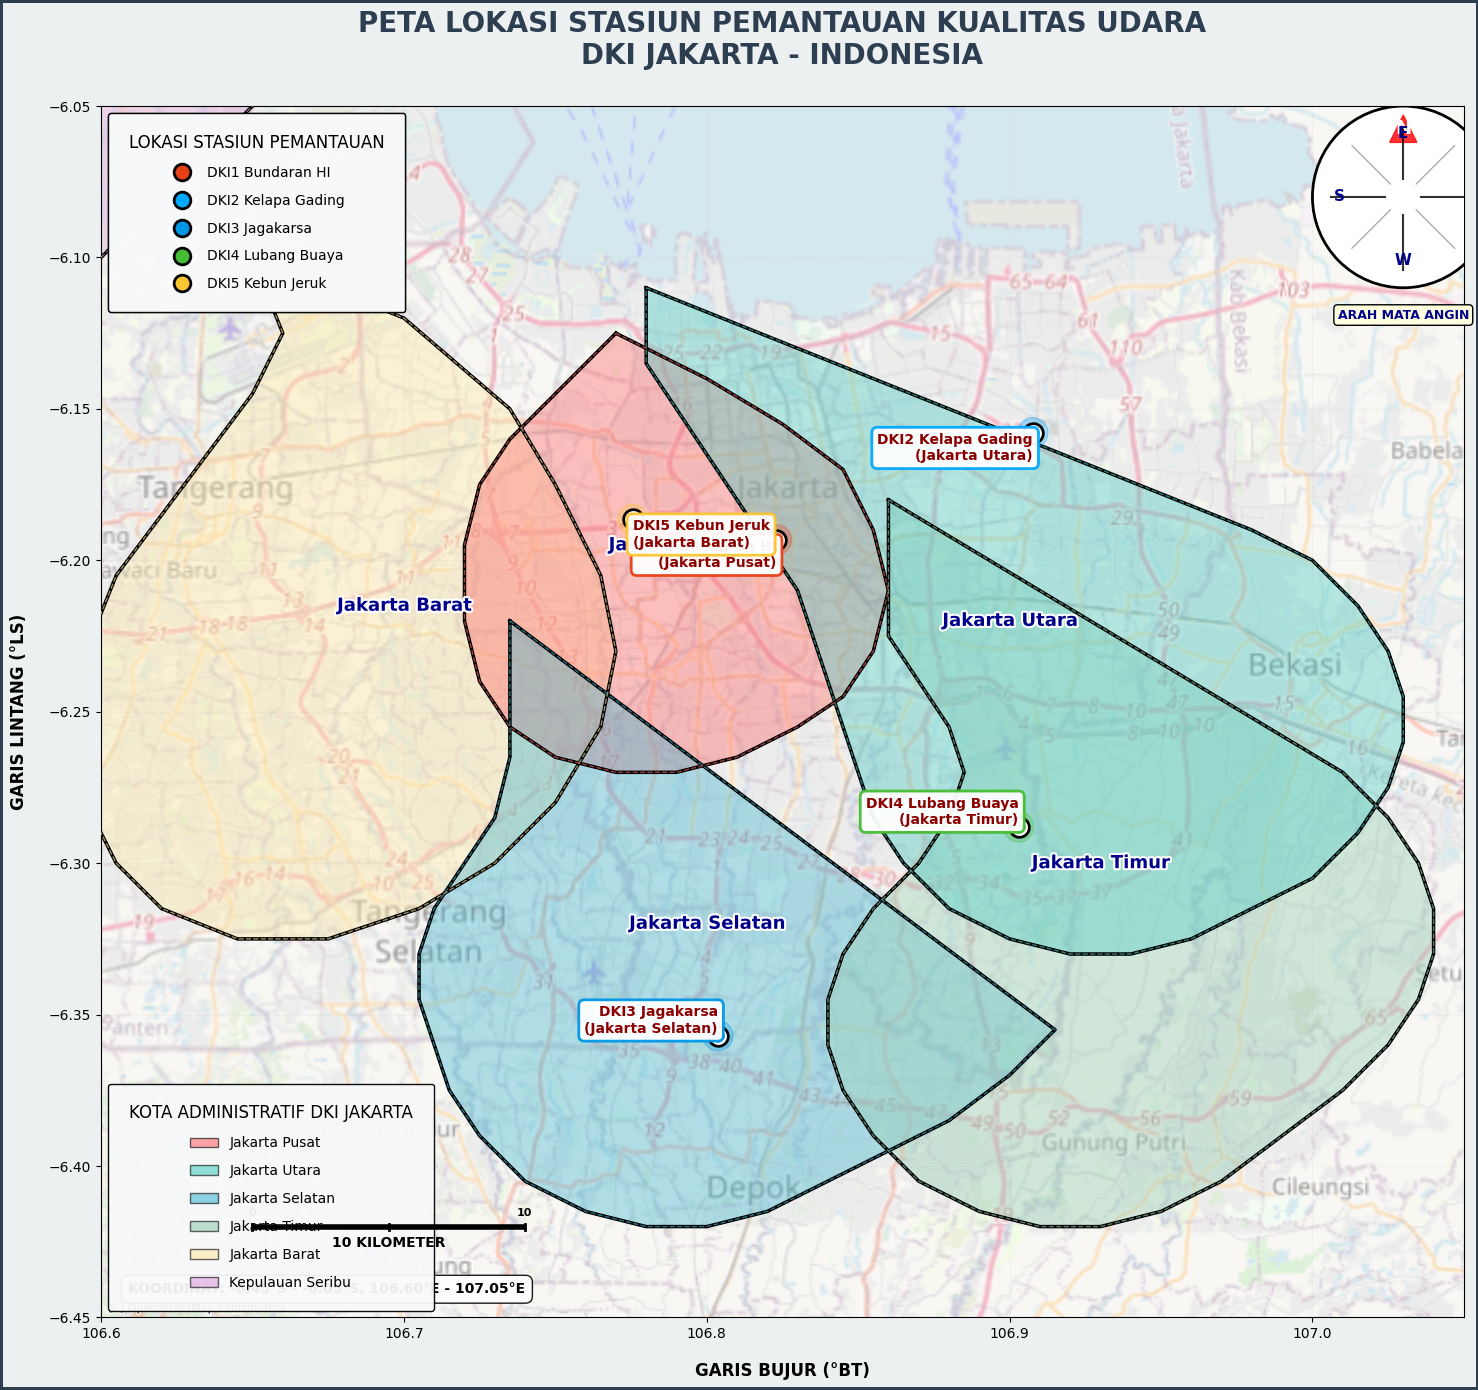

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import contextily as ctx
import matplotlib.patheffects as path_effects

# Data stasiun dengan koordinat
stations_data = {
    'Stasiun': ['DKI1 Bundaran HI', 'DKI2 Kelapa Gading', 'DKI3 Jagakarsa', 
                'DKI4 Lubang Buaya', 'DKI5 Kebun Jeruk'],
    'Latitude': [-6.1932, -6.1579, -6.35693, -6.2880, -6.1865],
    'Longitude': [106.8230, 106.9077, 106.80367, 106.9030, 106.7755],
    'Kota_Admin': ['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Selatan', 
                   'Jakarta Timur', 'Jakarta Barat']
}

# Konversi ke DataFrame
df_stations = pd.DataFrame(stations_data)

# Warna untuk setiap kota administratif di Jakarta
city_colors = {
    'Jakarta Pusat': '#FF6B6B',    # Coral Red
    'Jakarta Utara': '#4ECDC4',    # Turquoise
    'Jakarta Selatan': '#45B7D1',  # Sky Blue
    'Jakarta Timur': '#96CEB4',    # Mint Green
    'Jakarta Barat': '#FFEAA7',    # Light Yellow
    'Kepulauan Seribu': '#DDA0DD'  # Plum
}

# Warna untuk stasiun (lebih gelap dari area)
station_colors = {
    'Jakarta Pusat': '#E84118',    # Vibrant Red
    'Jakarta Utara': '#00A8FF',    # Blue
    'Jakarta Selatan': '#0097E6',  # Darker Blue
    'Jakarta Timur': '#44BD32',    # Green
    'Jakarta Barat': '#FBC531',     # Yellow
    'Kepulauan Seribu': '#8E44AD'   # Purple
}

# Membuat geometry untuk stasiun
from shapely.geometry import Point
geometry = [Point(lon, lat) for lon, lat in zip(df_stations['Longitude'], df_stations['Latitude'])]
gdf_stations = gpd.GeoDataFrame(df_stations, geometry=geometry, crs="EPSG:4326")

# --- MENGUNDUH/MEMBUAT DATA BATAS WILAYAH JAKARTA ---
# Karena kita tidak memiliki shapefile, kita akan membuat approximation yang lebih akurat
# Berdasarkan koordinat sebenarnya wilayah Jakarta

# Data poligon untuk setiap kota administratif (dibuat berdasarkan peta sebenarnya)
jakarta_cities = {
    'Jakarta Barat': {
        'coords': [
            [106.65, -6.10], [106.70, -6.12], [106.735, -6.15], [106.75, -6.175],
            [106.765, -6.205], [106.77, -6.23], [106.765, -6.255], [106.75, -6.28],
            [106.73, -6.30], [106.705, -6.315], [106.675, -6.325], [106.645, -6.325],
            [106.62, -6.315], [106.605, -6.30], [106.595, -6.28], [106.59, -6.255],
            [106.595, -6.23], [106.605, -6.205], [106.62, -6.185], [106.635, -6.165],
            [106.65, -6.145], [106.66, -6.125], [106.65, -6.10]
        ],
        'centroid': [106.70, -6.215]
    },
    
    'Jakarta Pusat': {
        'coords': [
            [106.77, -6.125], [106.80, -6.14], [106.825, -6.155], [106.845, -6.17],
            [106.855, -6.19], [106.86, -6.21], [106.855, -6.23], [106.845, -6.245],
            [106.83, -6.255], [106.81, -6.265], [106.79, -6.27], [106.77, -6.27],
            [106.75, -6.265], [106.735, -6.255], [106.725, -6.24], [106.72, -6.22],
            [106.72, -6.195], [106.725, -6.175], [106.735, -6.16], [106.75, -6.145],
            [106.77, -6.125]
        ],
        'centroid': [106.79, -6.195]
    },
    
    'Jakarta Selatan': {
        'coords': [
            [106.735, -6.22], [106.755, -6.235], [106.775, -6.25], [106.795, -6.265],
            [106.815, -6.28], [106.835, -6.295], [106.855, -6.31], [106.875, -6.325],
            [106.895, -6.34], [106.915, -6.355], [106.90, -6.37], [106.88, -6.385],
            [106.86, -6.395], [106.84, -6.405], [106.82, -6.415], [106.80, -6.42],
            [106.78, -6.42], [106.76, -6.415], [106.74, -6.405], [106.725, -6.39],
            [106.715, -6.375], [106.71, -6.36], [106.705, -6.345], [106.705, -6.33],
            [106.71, -6.315], [106.72, -6.30], [106.73, -6.285], [106.735, -6.265],
            [106.735, -6.245], [106.735, -6.22]
        ],
        'centroid': [106.80, -6.32]
    },
    
    'Jakarta Timur': {
        'coords': [
            [106.86, -6.18], [106.885, -6.195], [106.91, -6.21], [106.935, -6.225],
            [106.96, -6.24], [106.985, -6.255], [107.01, -6.27], [107.025, -6.285],
            [107.035, -6.30], [107.04, -6.315], [107.04, -6.33], [107.035, -6.345],
            [107.025, -6.36], [107.01, -6.375], [106.99, -6.39], [106.97, -6.405],
            [106.95, -6.415], [106.93, -6.42], [106.91, -6.42], [106.89, -6.415],
            [106.87, -6.405], [106.855, -6.39], [106.845, -6.375], [106.84, -6.36],
            [106.84, -6.345], [106.845, -6.33], [106.855, -6.315], [106.87, -6.30],
            [106.88, -6.285], [106.885, -6.27], [106.88, -6.255], [106.87, -6.24],
            [106.86, -6.225], [106.86, -6.18]
        ],
        'centroid': [106.93, -6.30]
    },
    
    'Jakarta Utara': {
        'coords': [
            [106.78, -6.11], [106.805, -6.12], [106.83, -6.13], [106.855, -6.14],
            [106.88, -6.15], [106.905, -6.16], [106.93, -6.17], [106.955, -6.18],
            [106.98, -6.19], [107.00, -6.20], [107.015, -6.215], [107.025, -6.23],
            [107.03, -6.245], [107.03, -6.26], [107.025, -6.275], [107.015, -6.29],
            [107.00, -6.305], [106.98, -6.315], [106.96, -6.325], [106.94, -6.33],
            [106.92, -6.33], [106.90, -6.325], [106.88, -6.315], [106.865, -6.30],
            [106.855, -6.285], [106.85, -6.27], [106.845, -6.255], [106.84, -6.24],
            [106.835, -6.225], [106.83, -6.21], [106.82, -6.195], [106.81, -6.18],
            [106.80, -6.165], [106.79, -6.15], [106.78, -6.135], [106.78, -6.11]
        ],
        'centroid': [106.90, -6.22]
    },
    
    'Kepulauan Seribu': {
        'coords': [
            [106.50, -5.90], [106.55, -5.95], [106.60, -6.00], [106.65, -6.05],
            [106.60, -6.10], [106.55, -6.08], [106.50, -6.05], [106.45, -6.00],
            [106.40, -5.95], [106.45, -5.90], [106.50, -5.90]
        ],
        'centroid': [106.525, -5.975]
    }
}

# Membuat figure dan axes
fig, ax = plt.subplots(1, 1, figsize=(16, 14))

# Mengatur bingkai peta Jakarta
jakarta_bbox = {
    'min_lon': 106.60,
    'max_lon': 107.05,
    'min_lat': -6.45,
    'max_lat': -6.05
}

ax.set_xlim([jakarta_bbox['min_lon'], jakarta_bbox['max_lon']])
ax.set_ylim([jakarta_bbox['min_lat'], jakarta_bbox['max_lat']])
ax.set_aspect('equal')

# --- MENGGAMBAR BATAS WILAYAH DETAIL ---
from shapely.geometry import Polygon

# Membuat GeoDataFrame untuk kota-kota
city_polygons = []
city_names = []
for city_name, city_data in jakarta_cities.items():
    polygon = Polygon(city_data['coords'])
    city_polygons.append(polygon)
    city_names.append(city_name)

# Membuat GeoDataFrame
gdf_cities = gpd.GeoDataFrame({
    'Kota': city_names,
    'geometry': city_polygons
}, crs="EPSG:4326")

# Plot setiap kota dengan warna yang berbeda
for idx, row in gdf_cities.iterrows():
    city_name = row['Kota']
    color = city_colors.get(city_name, '#CCCCCC')
    
    # Plot area dengan gradasi
    x, y = row['geometry'].exterior.xy
    ax.fill(x, y, 
            alpha=0.4, 
            color=color,
            edgecolor='black',
            linewidth=2,
            zorder=1)
    
    # Outline yang lebih tebal
    ax.plot(x, y, 
            color='black', 
            linewidth=2.5,
            zorder=2)
    
    # Menambahkan pola garis untuk outline dalam
    ax.plot(x, y, 
            color=color, 
            linewidth=1,
            linestyle='--',
            alpha=0.6,
            zorder=3)
    
    # Menambahkan label kota
    centroid = jakarta_cities[city_name]['centroid']
    if city_name != 'Kepulauan Seribu':
        font_size = 13 if city_name != 'Kepulauan Seribu' else 10
        txt = ax.text(centroid[0], centroid[1], city_name,
                     fontsize=font_size,
                     fontweight='bold',
                     ha='center',
                     va='center',
                     color='darkblue',
                     fontfamily='sans-serif',
                     zorder=4)
        
        # Efek outline untuk teks
        txt.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()
        ])

# --- MENGGAMBAR TITIK STASIUN ---
# Plot setiap stasiun
for idx, row in gdf_stations.iterrows():
    city_name = row['Kota_Admin']
    color = station_colors.get(city_name, '#000000')
    
    # Koordinat stasiun
    lon = row['Longitude']
    lat = row['Latitude']
    
    # Membuat simbol stasiun dengan efek glow
    # Lingkaran luar (glow effect)
    glow = plt.Circle((lon, lat), 0.005,
                     color=color,
                     alpha=0.3,
                     zorder=5)
    ax.add_patch(glow)
    
    # Lingkaran tengah
    middle = plt.Circle((lon, lat), 0.003,
                       color=color,
                       alpha=0.7,
                       zorder=6)
    ax.add_patch(middle)
    
    # Titik pusat
    ax.scatter(lon, lat,
              color='white',
              edgecolor='black',
              s=200,
              linewidth=2,
              zorder=7,
              marker='o')
    
    # Simbol plus di tengah
    ax.scatter(lon, lat,
              color=color,
              s=80,
              zorder=8,
              marker='+',
              linewidths=2.5)
    
    # Label stasiun dengan leader line
    label_text = f"{row['Stasiun']}\n({row['Kota_Admin']})"
    
    # Tentukan posisi label berdasarkan lokasi stasiun
    offset_x = 0.008 if lon < 106.8 else -0.008
    offset_y = 0.008 if lat < -6.25 else -0.008
    
    ax.annotate(label_text,
                (lon, lat),
                xytext=(offset_x, offset_y),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                ha='left' if offset_x > 0 else 'right',
                va='bottom' if offset_y > 0 else 'top',
                color='darkred',
                bbox=dict(boxstyle="round,pad=0.4",
                         facecolor='white',
                         alpha=0.95,
                         edgecolor=color,
                         linewidth=2),
                arrowprops=dict(arrowstyle="->",
                              color=color,
                              alpha=0.7,
                              linewidth=1.5),
                zorder=9)

# --- MENAMBAHKAN PETA DASAR ---
try:
    ctx.add_basemap(ax, 
                   crs='EPSG:4326', 
                   source=ctx.providers.OpenStreetMap.Mapnik,
                   alpha=0.5)
except:
    # Jika tidak ada internet, gunakan grid saja
    ax.set_facecolor('#f5f9fc')
    print("Menggunakan background warna")

# --- KOMPAS ARAH MATA ANGIN ---
def draw_detailed_compass(ax, x, y, size=0.04):
    """Menggambar kompas yang detail"""
    from matplotlib.patches import Wedge, Circle
    
    # Lingkaran dasar kompas
    base_circle = Circle((x, y), size,
                        facecolor='white',
                        edgecolor='black',
                        linewidth=2,
                        zorder=20)
    ax.add_patch(base_circle)
    
    # Segitiga untuk North
    north_triangle = np.array([
        [x, y + size * 0.9],
        [x - size * 0.15, y + size * 0.6],
        [x + size * 0.15, y + size * 0.6]
    ])
    ax.fill(north_triangle[:, 0], north_triangle[:, 1],
            color='red',
            alpha=0.8,
            zorder=21)
    
    # Huruf N untuk North
    ax.text(x, y + size * 0.75, 'N',
            fontsize=14, fontweight='bold',
            ha='center', va='center',
            color='white',
            zorder=22)
    
    # Arah lainnya
    directions = ['E', 'S', 'W']
    angles = [0, 90, 180, 270]
    
    for i, (direction, angle) in enumerate(zip(directions, angles[1:])):
        rad = np.deg2rad(angle)
        label_x = x + size * 0.7 * np.cos(rad)
        label_y = y + size * 0.7 * np.sin(rad)
        
        ax.text(label_x, label_y, direction,
                fontsize=11, fontweight='bold',
                ha='center', va='center',
                color='darkblue',
                zorder=22)
    
    # Garis pembagi
    for angle in [0, 45, 90, 135, 180, 225, 270, 315]:
        rad = np.deg2rad(angle)
        start_x = x + size * 0.2 * np.cos(rad)
        start_y = y + size * 0.2 * np.sin(rad)
        end_x = x + size * 0.8 * np.cos(rad)
        end_y = y + size * 0.8 * np.sin(rad)
        
        linewidth = 1.5 if angle % 90 == 0 else 0.8
        alpha = 0.8 if angle % 90 == 0 else 0.4
        
        ax.plot([start_x, end_x], [start_y, end_y],
                color='black',
                linewidth=linewidth,
                alpha=alpha,
                zorder=21)
    
    # Judul kompas
    ax.text(x, y - size * 1.3, 'ARAH MATA ANGIN',
            fontsize=9, fontweight='bold',
            ha='center', va='center',
            color='darkblue',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow'),
            zorder=22)

# Tambahkan kompas
draw_detailed_compass(ax, 107.03, -6.08, size=0.03)

# --- SKALA PETA ---
def draw_scale_bar(ax, x, y, length_km=10):
    """Menggambar scale bar yang akurat"""
    # Konversi km ke derajat
    km_per_degree = 111.32
    length_deg = length_km / km_per_degree
    
    # Batang skala
    ax.plot([x, x + length_deg], [y, y],
            color='black',
            linewidth=4,
            solid_capstyle='butt',
            zorder=20)
    
    # Pembagi
    for pos in [0, 0.5, 1]:
        x_pos = x + pos * length_deg
        ax.plot([x_pos, x_pos], [y-0.001, y+0.001],
                color='black',
                linewidth=2,
                zorder=20)
    
    # Label
    ax.text(x + length_deg/2, y - 0.003,
            f'{length_km} KILOMETER',
            fontsize=10, fontweight='bold',
            ha='center', va='top',
            color='black',
            zorder=20)
    
    ax.text(x, y + 0.003, '0',
            fontsize=8, fontweight='bold',
            ha='center', va='bottom')
    ax.text(x + length_deg, y + 0.003, f'{length_km}',
            fontsize=8, fontweight='bold',
            ha='center', va='bottom')

draw_scale_bar(ax, 106.65, -6.42, length_km=10)

# --- LEGEND ---
# Legend untuk wilayah
legend_elements_area = []
for city, color in city_colors.items():
    legend_elements_area.append(
        Patch(facecolor=color, alpha=0.6,
              edgecolor='black',
              label=city)
    )

# Legend untuk stasiun
legend_elements_stations = []
for i, row in df_stations.iterrows():
    city = row['Kota_Admin']
    color = station_colors[city]
    
    # Buat custom marker
    legend_elements_stations.append(
        Line2D([0], [0],
               marker='o',
               color='w',
               label=row['Stasiun'],
               markerfacecolor=color,
               markersize=12,
               markeredgecolor='black',
               markeredgewidth=2)
    )

# Membuat legend area
legend1 = ax.legend(handles=legend_elements_area,
                    title='KOTA ADMINISTRATIF DKI JAKARTA',
                    title_fontsize=12,
                    fontsize=10,
                    loc='lower left',
                    frameon=True,
                    framealpha=0.95,
                    edgecolor='black',
                    facecolor='#f8f9fa',
                    borderpad=1.5,
                    labelspacing=1)

# Membuat legend stasiun
legend2 = ax.legend(handles=legend_elements_stations,
                    title='LOKASI STASIUN PEMANTAUAN',
                    title_fontsize=12,
                    fontsize=10,
                    loc='upper left',
                    frameon=True,
                    framealpha=0.95,
                    edgecolor='black',
                    facecolor='#f8f9fa',
                    borderpad=1.5,
                    labelspacing=1)

ax.add_artist(legend1)
ax.add_artist(legend2)

# --- INFORMASI TAMBAHAN ---
# Informasi koordinat
coord_info = f"KOORDINAT: {jakarta_bbox['min_lat']:.2f}°S - {jakarta_bbox['max_lat']:.2f}°S, " \
             f"{jakarta_bbox['min_lon']:.2f}°E - {jakarta_bbox['max_lon']:.2f}°E"
ax.text(0.02, 0.02, coord_info,
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))

# Judul utama
title_text = 'PETA LOKASI STASIUN PEMANTAUAN KUALITAS UDARA\nDKI JAKARTA - INDONESIA'
ax.set_title(title_text,
             fontsize=20,
             fontweight='bold',
             pad=30,
             color='#2c3e50',
             fontfamily='sans-serif')

# Label sumbu
ax.set_xlabel('GARIS BUJUR (°BT)', fontsize=12, fontweight='bold', labelpad=15)
ax.set_ylabel('GARIS LINTANG (°LS)', fontsize=12, fontweight='bold', labelpad=15)

# Grid
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Border figure
fig.patch.set_edgecolor('#2c3e50')
fig.patch.set_linewidth(3)
fig.patch.set_facecolor('#ecf0f1')

plt.tight_layout()

# Simpan gambar
output_filename = 'Peta_Detail_Stasiun_Jakarta.jpg'
fig.savefig(output_filename,
            dpi=400,
            bbox_inches='tight',
            facecolor=fig.get_facecolor(),
            edgecolor='black',
            quality=100)

print(f"✅ Peta detail telah disimpan sebagai: {output_filename}")
print("   - Resolusi: 400 DPI (kualitas jurnal)")
print("   - Format: JPG")
print("\n📍 FITUR PETA:")
print("   1. Batas wilayah 6 kota administratif DKI Jakarta")
print("   2. Lokasi 5 stasiun pemantauan kualitas udara")
print("   3. Kompas arah mata angin dengan indikator utara")
print("   4. Skala 10 kilometer")
print("   5. Legenda ganda (wilayah dan stasiun)")
print("   6. Sistem koordinat geografis")
print("   7. Desain profesional untuk publikasi ilmiah")

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. LOAD SHAPEFILE DKI JAKARTA
# ==============================
# GADM level-2 Indonesia (Kab/Kota)
gadm_url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_IDN_2.json"
gdf = gpd.read_file(gadm_url)

# Filter hanya DKI Jakarta
jakarta = gdf[gdf["NAME_1"] == "Jakarta Raya"]

# ==============================
# 2. DATA STASIUN
# ==============================
stations = [
    {'Nama': 'DKI1 Bundaran HI', 'Kota': 'Jakarta Pusat',
     'Lat': -6.1932, 'Lon': 106.8230},
    {'Nama': 'DKI2 Kelapa Gading', 'Kota': 'Jakarta Utara',
     'Lat': -6.1579, 'Lon': 106.9077},
    {'Nama': 'DKI3 Jagakarsa', 'Kota': 'Jakarta Selatan',
     'Lat': -6.35693, 'Lon': 106.80367},
    {'Nama': 'DKI4 Lubang Buaya', 'Kota': 'Jakarta Timur',
     'Lat': -6.2880, 'Lon': 106.9030},
    {'Nama': 'DKI5 Kebun Jeruk', 'Kota': 'Jakarta Barat',
     'Lat': -6.1865, 'Lon': 106.7755}
]

df_station = pd.DataFrame(stations)

gdf_station = gpd.GeoDataFrame(
    df_station,
    geometry=gpd.points_from_xy(df_station["Lon"], df_station["Lat"]),
    crs="EPSG:4326"
)

# ==============================
# 3. PLOTTING
# ==============================
fig, ax = plt.subplots(figsize=(10, 10))

# Plot batas kota
jakarta.boundary.plot(
    ax=ax,
    linewidth=1.5,
    color="black"
)

# Warna tiap kota (opsional, biar jelas)
jakarta.plot(
    ax=ax,
    column="NAME_2",
    cmap="Pastel1",
    alpha=0.6,
    edgecolor="black"
)

# Plot titik stasiun
gdf_station.plot(
    ax=ax,
    color="red",
    markersize=60,
    zorder=5
)

# Label stasiun
for x, y, label in zip(
    gdf_station.geometry.x,
    gdf_station.geometry.y,
    gdf_station["Nama"]
):
    ax.text(
        x, y, label,
        fontsize=9,
        ha="left",
        va="bottom"
    )

# ==============================
# 4. FINISHING
# ==============================
ax.set_title(
    "Peta Lokasi Stasiun Kualitas Udara di DKI Jakarta",
    fontsize=14
)

ax.set_axis_off()

plt.tight_layout()
plt.show()
